# Capstone Webscrapping using BeautifulSoup

This notebook contains guidances & tasks on the data processing for the application

## background

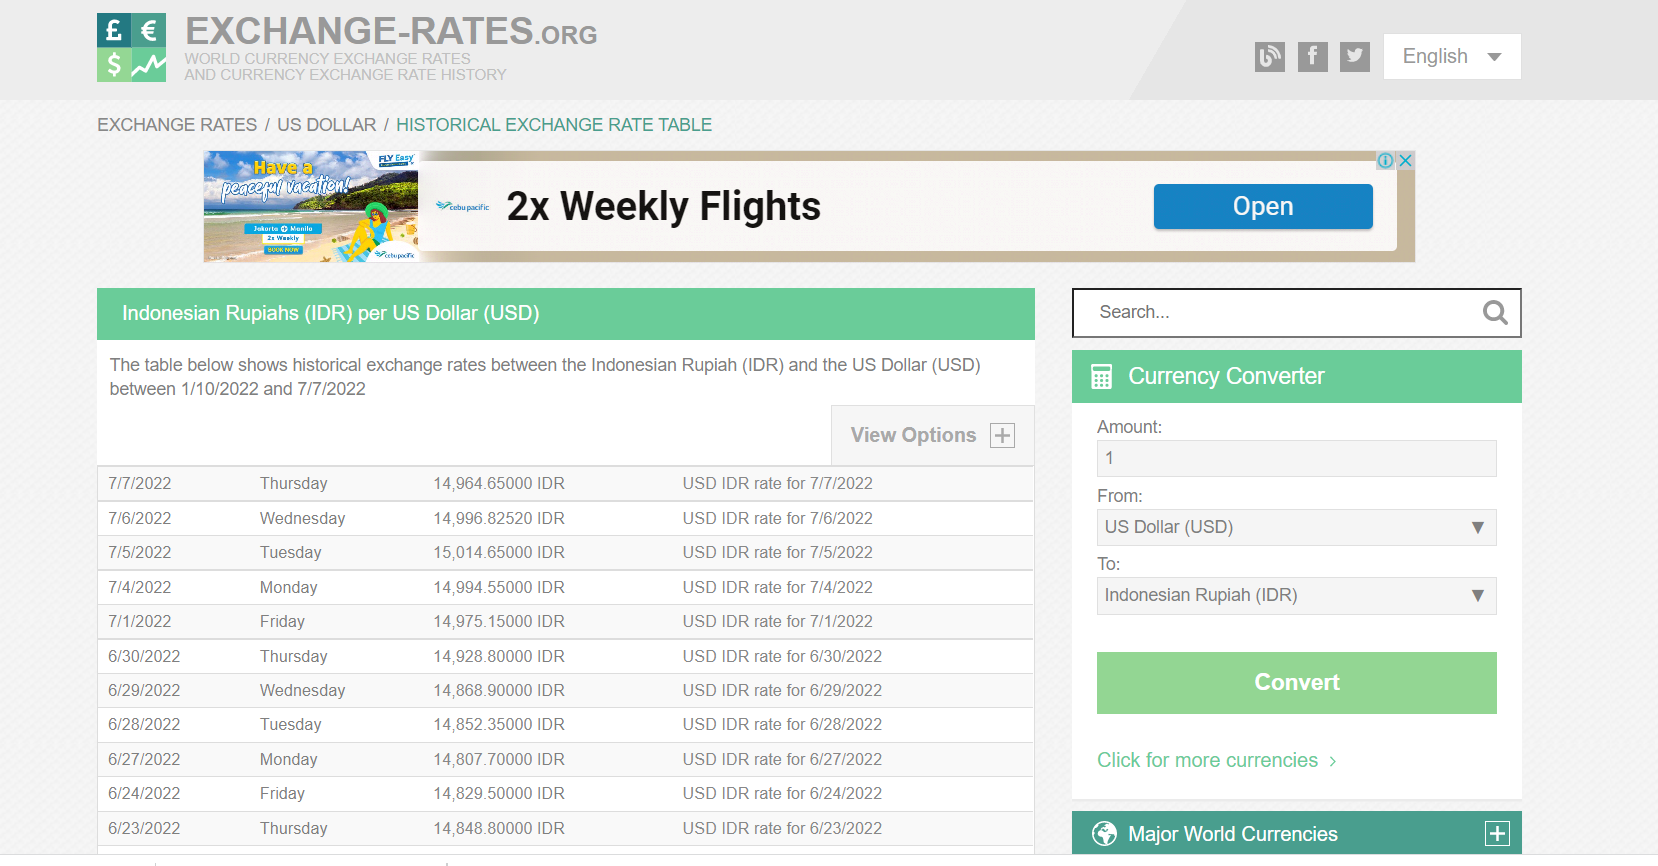

## Requesting the Data and Creating a BeautifulSoup

Let's begin with requesting the web from the site with `get` method.

In [1]:
import requests
url_get = requests.get('https://www.coingecko.com/en/coins/ethereum/historical_data#panel',  headers = { 'User-Agent': 'Popular browser\'s user-agent', })

To visualize what exactly you get from the `request.get`, we can use .content so ee what we exactly get, in here i slice it so it won't make our screen full of the html we get from the page. You can delete the slicing if you want to see what we fully get.

In [2]:
url_get.content[1:500]

b'!DOCTYPE html>\n<html lang="en">\n<head>\n<script src="/cdn-cgi/apps/head/gYtXOyllgyP3-Z2iKTP8rRWGBm4.js"></script><script async defer src="https://www.googleoptimize.com/optimize.js?id=GTM-W3CD992"></script>\n<meta charset="utf-8">\n<meta http-equiv="X-UA-Compatible" content="IE=edge">\n<meta name="viewport" content="width=device-width, initial-scale=1.0">\n<link rel="shortcut icon" href="/favicon.ico">\n<link type="application/opensearchdescription+xml" rel="search" href="/OpensearchDescription.xml" '

As we can see we get a very unstructured and complex html, which actually contains the codes needed to show the webpages on your web browser. But we as human still confused what and where we can use that piece of code, so here where we use the beautifulsoup. Beautiful soup class will result a beautifulsoup object. Beautiful Soup transforms a complex HTML document into a complex tree of Python objects. 

Let's make Beautiful soup object and feel free to explore the object here.

In [3]:
from bs4 import BeautifulSoup 

soup = BeautifulSoup(url_get.content,"html.parser")
print(type(soup))

<class 'bs4.BeautifulSoup'>


## Finding the right key to scrap the data & Extracting the right information

Find the key and put the key into the `.find()` Put all the exploring the right key at this cell. (please change this markdown with your explanation)

In [4]:
table = soup.find('tbody')
print(table.prettify()[:500])

<tbody>
 <tr>
  <th class="font-semibold text-center" scope="row">
   2022-07-19
  </th>
  <td class="text-center">
   $187,518,878,564
  </td>
  <td class="text-center">
   $26,437,290,054
  </td>
  <td class="text-center">
   $1,570.66
  </td>
  <td class="text-center">
   N/A
  </td>
 </tr>
 <tr>
  <th class="font-semibold text-center" scope="row">
   2022-07-18
  </th>
  <td class="text-center">
   $161,551,223,982
  </td>
  <td class="text-center">
   $15,797,648,344
  </td>
  <td class="te


Finding row length.

In [5]:
row = table.find_all('th', attrs={'scope': 'row'})
row_length = len(row)
row_length

31

In [7]:
temp = []
for tr in soup.find_all('tr')[1:]:
  ths = tr.find_all('th')
  date = ths[0].text
  tds = tr.find_all('td')
  volume = tds[1].text.strip()

  temp.append((date,volume))
temp

[('2022-07-19', '$26,437,290,054'),
 ('2022-07-18', '$15,797,648,344'),
 ('2022-07-17', '$19,025,831,555'),
 ('2022-07-16', '$16,817,194,904'),
 ('2022-07-15', '$16,474,223,861'),
 ('2022-07-14', '$17,936,886,120'),
 ('2022-07-13', '$11,555,798,333'),
 ('2022-07-12', '$11,693,162,178'),
 ('2022-07-11', '$10,374,466,605'),
 ('2022-07-10', '$7,870,254,818'),
 ('2022-07-09', '$15,346,600,702'),
 ('2022-07-08', '$13,170,522,513'),
 ('2022-07-07', '$14,422,132,962'),
 ('2022-07-06', '$15,393,490,018'),
 ('2022-07-05', '$13,827,342,516'),
 ('2022-07-04', '$7,939,419,239'),
 ('2022-07-03', '$9,601,263,305'),
 ('2022-07-02', '$17,420,131,788'),
 ('2022-07-01', '$15,402,670,572'),
 ('2022-06-30', '$14,755,440,934'),
 ('2022-06-29', '$13,181,896,477'),
 ('2022-06-28', '$12,044,359,298'),
 ('2022-06-27', '$11,375,746,747'),
 ('2022-06-26', '$11,692,717,742'),
 ('2022-06-25', '$16,288,488,163'),
 ('2022-06-24', '$14,247,953,151'),
 ('2022-06-23', '$14,331,217,471'),
 ('2022-06-22', '$14,838,197,88

Do the scrapping process here (please change this markdown with your explanation)

## Creating data frame & Data wrangling

Put the array into dataframe

In [24]:
import pandas as pd
eth = pd.DataFrame(temp, columns = ('date','volume'))
eth

,date,volume
0,2022-07-19,"$26,437,290,054"
1,2022-07-18,"$15,797,648,344"
2,2022-07-17,"$19,025,831,555"
3,2022-07-16,"$16,817,194,904"
4,2022-07-15,"$16,474,223,861"
5,2022-07-14,"$17,936,886,120"
6,2022-07-13,"$11,555,798,333"
7,2022-07-12,"$11,693,162,178"
8,2022-07-11,"$10,374,466,605"
9,2022-07-10,"$7,870,254,818"


Do the data cleaning here (please change this markdown with your explanation of what you do for data wrangling)

In [21]:
eth['volume'] = eth['volume'].str.replace("$", "")
eth['volume'] = eth['volume'].str.replace(",", "")
eth['volume'] = eth['volume'].astype('float64')

C:\Users\bryan\AppData\Local\Temp\ipykernel_16292\3216805168.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  eth['volume'] = eth['volume'].str.replace("$", "")


Data visualisation (please change this markdown with your explanation of what you do for data wrangling)

In [22]:
eth.dtypes

date       object
volume    float64
dtype: object

<AxesSubplot:>

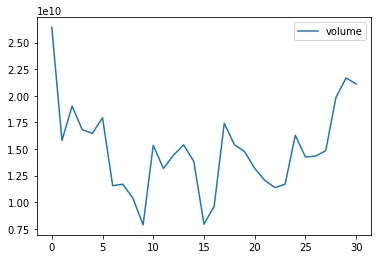

In [23]:
eth.plot()

### Implementing your webscrapping to the flask dashboard

- Copy paste all of your web scrapping process to the desired position on the `app.py`
- Changing the title of the dasboard at `index.html`

## Finishing This Notebook with Your Analysis and Conclusion

First you can do start with making the data visualisation. 

In [ ]:
#based on the chart above, ethreum volume from june to july dropped, with ethreum volume reaching its peak between 11-16 june and ehtreum volume were at its lowest between 6-11 july


(Put your analysis and conclusion here.)

### Extra Challange

This will be not included to the scoring. 

- You can create additional analysis from the data.
- Implement it to the dashboard with at `app.py` dan `index.html`.